In [103]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer

In [104]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\hWFH_INDIA.csv',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0)

In [105]:
df.head(20)

,created_at,text,screen_name,location
0,30-01-2022 08:10,b'Choose The Best Folding Desks Design Ideas F...,b'KreateCube',b'India'
1,29-01-2022 13:53,b'Whether you\xe2\x80\x99re working at home te...,b'fabzindia',"b'Kannur, Kerala, India'"
2,29-01-2022 07:37,b'Enjoy best in class lighting and fill your h...,b'dwosaautomation',"b'Bengaluru, India'"
3,28-01-2022 16:52,b'How to remove negative energy.....\n@UxFarma...,b'AstroVastuNume1',"b'New Delhi, India'"
4,28-01-2022 10:46,b'THE PERFECT SPACE TO REDESIGN YOUR WORK PROD...,b'SpacesSupreme',"b'Hyderabad, India'"
5,28-01-2022 10:42,b'UrSpayce helps you list events and sell tick...,b'UrSpayce',"b'Bengaluru, India'"
6,28-01-2022 09:56,b'The perfect desk for your home office\nhttps...,b'LuxeBookIndia',"b'Mumbai, India'"
7,28-01-2022 02:39,b'Glazed Vitrified Tiles \xe2\x9c\xa8\n.\n300*...,b'OverseasParshwa',"b'Gujarat, India'"
8,27-01-2022 20:05,b'We are the Luxury Sofa Manufacturer\nWe Manu...,b'Clubinterio',"b'Hyderabad, India'"
9,27-01-2022 14:30,b'A must-read for all those doing work from ho...,b'jc_chaudhry',"b'New Delhi, India'"


In [106]:
df.shape

(263, 4)

In [107]:

    df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
df ['text']= df['text'].str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df['text'] = df['text'].str.replace('[' 'b]','')
#df['text'] = df['text'].str.replace('[x[a-z]]','')
df ['text']= df['text'].str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


In [108]:
df.head(30)

,created_at,text,screen_name,location
0,30-01-2022 08:10,b choose the best folding desks design ideas f...,b'KreateCube',b'India'
1,29-01-2022 13:53,b whether you xe x xre working at home tempora...,b'fabzindia',"b'Kannur, Kerala, India'"
2,29-01-2022 07:37,b enjoy best in class lighting and fill your h...,b'dwosaautomation',"b'Bengaluru, India'"
3,28-01-2022 16:52,b how to remove negative energy n uxfarma...,b'AstroVastuNume1',"b'New Delhi, India'"
4,28-01-2022 10:46,b the perfect space to redesign your work prod...,b'SpacesSupreme',"b'Hyderabad, India'"
5,28-01-2022 10:42,b urspayce helps you list events and sell tick...,b'UrSpayce',"b'Bengaluru, India'"
6,28-01-2022 09:56,b the perfect desk for your home office n lux...,b'LuxeBookIndia',"b'Mumbai, India'"
7,28-01-2022 02:39,b glazed vitrified tiles xe xc xa n n mm n ...,b'OverseasParshwa',"b'Gujarat, India'"
8,27-01-2022 20:05,b we are the luxury sofa manufacturer nwe manu...,b'Clubinterio',"b'Hyderabad, India'"
9,27-01-2022 14:30,b a must read for all those doing work from ho...,b'jc_chaudhry',"b'New Delhi, India'"


In [109]:
 nltk.download('stopwords')  # Downloading stop words
#stop = set(stopwords.words('english'))  # Selecting English stop words
#df['text'] = df['text'] .apply(lambda x: [item for item in x if item not in stop])  # Removing stop words from each string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
df.shape[0]

263

In [111]:
df['text'][10]

'b opple products offer flicker free lights with multiple options light color and power band to let you create a balan xe x xa'

In [112]:
lemmatizer = WordNetLemmatizer()
for i in range(df.shape[0]):
    words=nltk.word_tokenize(df['text'][i])
    words = [lemmatizer.lemmatize(w, pos='a') for w in words if w not in set(stopwords.words("english")) ]
    df['text'][i]=' '.join(words)

In [113]:
df['text'][10]

'b opple products offer flicker free lights multiple options light color power band let create balan xe x xa'

In [114]:
df.head(10)

,created_at,text,screen_name,location
0,30-01-2022 08:10,b choose best folding desks design ideas space...,b'KreateCube',b'India'
1,29-01-2022 13:53,b whether xe x xre working home temporarily pe...,b'fabzindia',"b'Kannur, Kerala, India'"
2,29-01-2022 07:37,b enjoy best class lighting fill home colours ...,b'dwosaautomation',"b'Bengaluru, India'"
3,28-01-2022 16:52,b remove negative energy n uxfarman inspire_qu...,b'AstroVastuNume1',"b'New Delhi, India'"
4,28-01-2022 10:46,b perfect space redesign work productivity n n...,b'SpacesSupreme',"b'Hyderabad, India'"
5,28-01-2022 10:42,b urspayce helps list events sell tickets onli...,b'UrSpayce',"b'Bengaluru, India'"
6,28-01-2022 09:56,b perfect desk home office n luxebook homeoffi...,b'LuxeBookIndia',"b'Mumbai, India'"
7,28-01-2022 02:39,b glazed vitrified tiles xe xc xa n n mm n n x...,b'OverseasParshwa',"b'Gujarat, India'"
8,27-01-2022 20:05,b luxury sofa manufacturer nwe manufacture lux...,b'Clubinterio',"b'Hyderabad, India'"
9,27-01-2022 14:30,b must read work home n n vastu vastutips xe x xa,b'jc_chaudhry',"b'New Delhi, India'"


In [115]:
df['text'] = df['text'].str.replace('' 'x' '','')

In [116]:
df.head(10)

,created_at,text,screen_name,location
0,30-01-2022 08:10,b choose best folding desks design ideas space...,b'KreateCube',b'India'
1,29-01-2022 13:53,b whether e re working home temporarily perma...,b'fabzindia',"b'Kannur, Kerala, India'"
2,29-01-2022 07:37,b enjoy best class lighting fill home colours ...,b'dwosaautomation',"b'Bengaluru, India'"
3,28-01-2022 16:52,b remove negative energy n ufarman inspire_qu ...,b'AstroVastuNume1',"b'New Delhi, India'"
4,28-01-2022 10:46,b perfect space redesign work productivity n n...,b'SpacesSupreme',"b'Hyderabad, India'"
5,28-01-2022 10:42,b urspayce helps list events sell tickets onli...,b'UrSpayce',"b'Bengaluru, India'"
6,28-01-2022 09:56,b perfect desk home office n luebook homeoffic...,b'LuxeBookIndia',"b'Mumbai, India'"
7,28-01-2022 02:39,b glazed vitrified tiles e c a n n mm n n f f ...,b'OverseasParshwa',"b'Gujarat, India'"
8,27-01-2022 20:05,b luury sofa manufacturer nwe manufacture luur...,b'Clubinterio',"b'Hyderabad, India'"
9,27-01-2022 14:30,b must read work home n n vastu vastutips e a,b'jc_chaudhry',"b'New Delhi, India'"


In [117]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

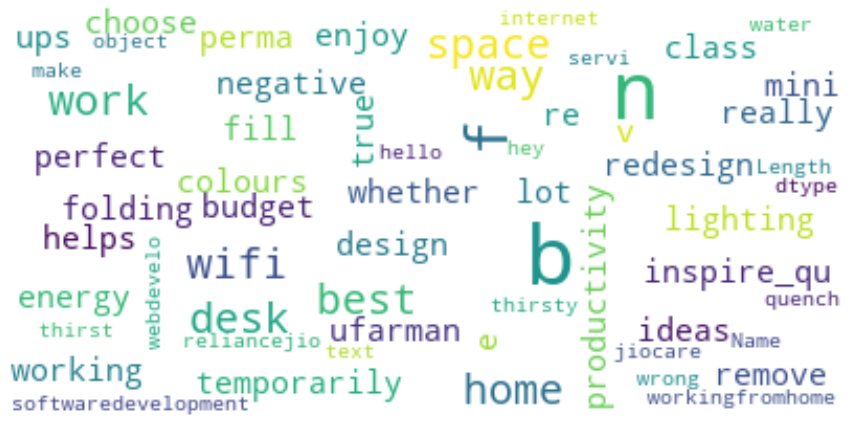

In [118]:
#wordcloud after preprocessing and removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [119]:
df.shape

(263, 4)

In [120]:
df.isna().sum
tweet=df.copy()

In [121]:
tweet.head()

,created_at,text,screen_name,location
0,30-01-2022 08:10,b choose best folding desks design ideas space...,b'KreateCube',b'India'
1,29-01-2022 13:53,b whether e re working home temporarily perma...,b'fabzindia',"b'Kannur, Kerala, India'"
2,29-01-2022 07:37,b enjoy best class lighting fill home colours ...,b'dwosaautomation',"b'Bengaluru, India'"
3,28-01-2022 16:52,b remove negative energy n ufarman inspire_qu ...,b'AstroVastuNume1',"b'New Delhi, India'"
4,28-01-2022 10:46,b perfect space redesign work productivity n n...,b'SpacesSupreme',"b'Hyderabad, India'"


In [122]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

,created_at,text,screen_name,location,sentiment,polarity
0,30-01-2022 08:10,b choose best folding desks design ideas space...,b'KreateCube',b'India',positive,1.0
1,29-01-2022 13:53,b whether e re working home temporarily perma...,b'fabzindia',"b'Kannur, Kerala, India'",positive,0.55
2,29-01-2022 07:37,b enjoy best class lighting fill home colours ...,b'dwosaautomation',"b'Bengaluru, India'",positive,0.7
3,28-01-2022 16:52,b remove negative energy n ufarman inspire_qu ...,b'AstroVastuNume1',"b'New Delhi, India'",negative,-0.036364
4,28-01-2022 10:46,b perfect space redesign work productivity n n...,b'SpacesSupreme',"b'Hyderabad, India'",positive,1.0


In [123]:
tweet['sentiment'].value_counts()

positive    142
neutral      90
negative     31
Name: sentiment, dtype: int64

In [124]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\hWFH_INDIA pol sent.csv")

In [125]:

sentiment_df.head(10)

,text,polarity,sentiment
0,b choose best folding desks design ideas space...,1.0,positive
1,b whether e re working home temporarily perma...,0.55,positive
2,b enjoy best class lighting fill home colours ...,0.7,positive
3,b remove negative energy n ufarman inspire_qu ...,-0.036364,negative
4,b perfect space redesign work productivity n n...,1.0,positive
5,b urspayce helps list events sell tickets onli...,0.0,neutral
6,b perfect desk home office n luebook homeoffic...,1.0,positive
7,b glazed vitrified tiles e c a n n mm n n f f ...,0.0,neutral
8,b luury sofa manufacturer nwe manufacture luur...,0.0,neutral
9,b must read work home n n vastu vastutips e a,0.0,neutral


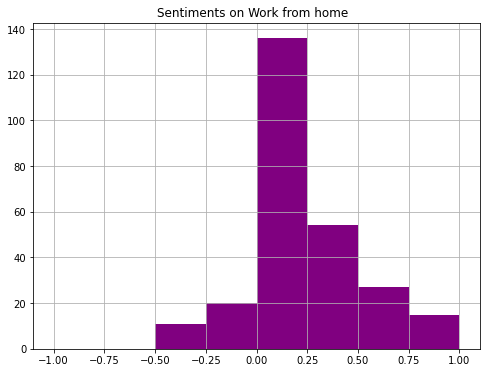

In [126]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments on Work from home  ")
plt.show()

In [127]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(263,)

In [128]:
x=tweet['text'].values
x.shape

(263,)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(210,)
(210,)
(53,)


(53,)

positive    142
neutral      90
negative     31
Name: sentiment, dtype: int64


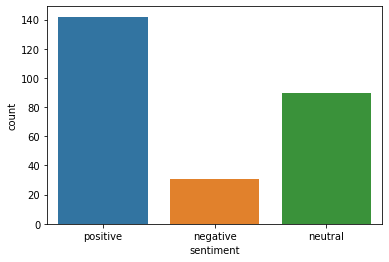

In [131]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

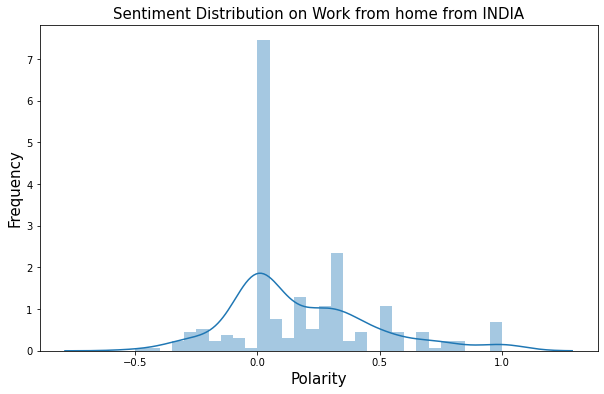

In [132]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution on Work from home from INDIA',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

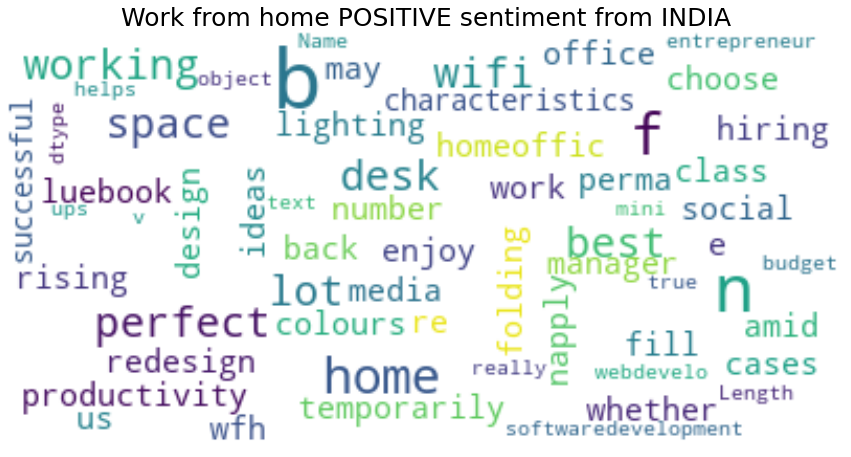

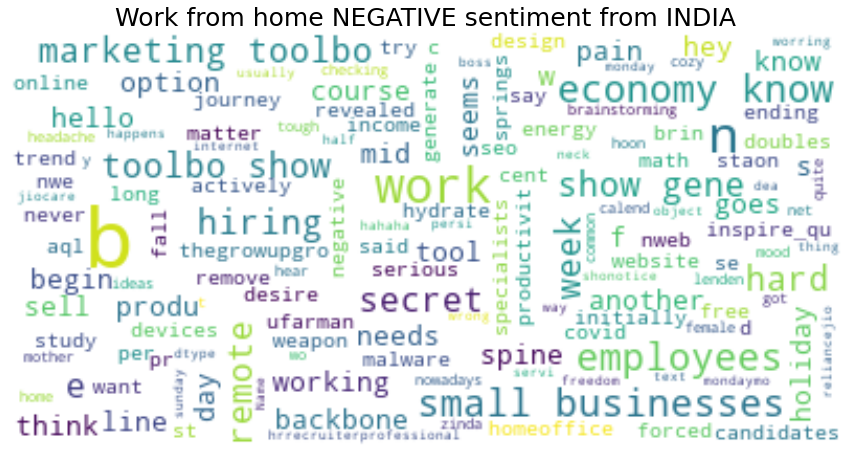

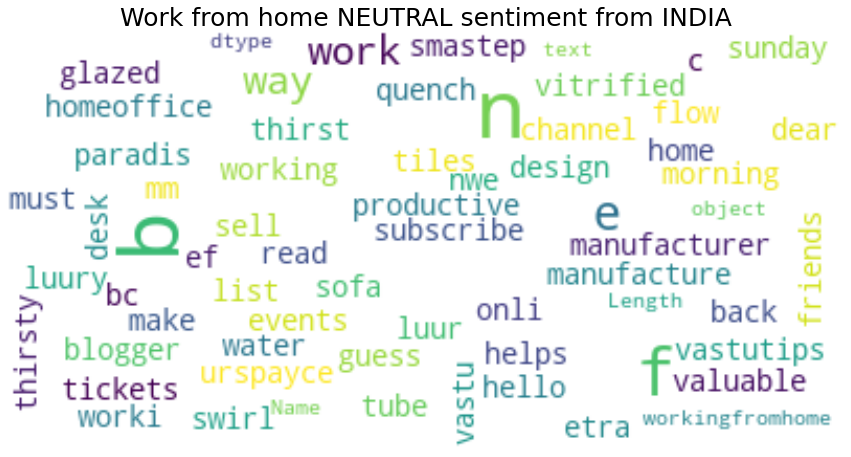

In [133]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'Work from home POSITIVE sentiment from INDIA')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'Work from home NEGATIVE sentiment from INDIA')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'Work from home NEUTRAL sentiment from INDIA')

In [134]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

,created_at,text,screen_name,location,polarity
sentiment,,,,,
negative,28-01-2022 16:5224-01-2022 07:1830-01-2022 04:...,b remove negative energy n ufarman inspire_qu ...,b'AstroVastuNume1'b'IfritaIt'b'bsindia'b'aqle_...,"b'New Delhi, India'b'india'b'India'b'Gurgaon, ...",-6.590947
neutral,28-01-2022 10:4228-01-2022 02:3927-01-2022 20:...,b urspayce helps list events sell tickets onli...,b'UrSpayce'b'OverseasParshwa'b'Clubinterio'b'j...,"b'Bengaluru, India'b'Gujarat, India'b'Hyderaba...",0.000000
positive,30-01-2022 08:1029-01-2022 13:5329-01-2022 07:...,b choose best folding desks design ideas space...,b'KreateCube'b'fabzindia'b'dwosaautomation'b'S...,"b'India'b'Kannur, Kerala, India'b'Bengaluru, I...",53.483377


In [135]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [136]:
words

['b',
 'choose',
 'best',
 'folding',
 'desks',
 'design',
 'ideas',
 'space',
 'smahome',
 'offices',
 'n',
 'officedesk',
 'e',
 'a',
 'b',
 'whether',
 'e',
 're',
 'working',
 'home',
 'temporarily',
 'permanently',
 'handy',
 'homeoffice',
 'tips',
 'sure',
 'help',
 'boost',
 'e',
 'a',
 'b',
 'enjoy',
 'best',
 'class',
 'lighting',
 'fill',
 'home',
 'colours',
 'n',
 'n',
 'homeautomation',
 'dwosa',
 'followfollowback',
 'e',
 'a',
 'b',
 'remove',
 'negative',
 'energy',
 'n',
 'ufarman',
 'inspire_qu',
 'newprofilepicss',
 'energytransition',
 'challenge',
 'positive',
 'e',
 'a',
 'b',
 'perfect',
 'space',
 'redesign',
 'work',
 'productivity',
 'n',
 'nlocation',
 'hi',
 'tech',
 'city',
 'amp',
 'banjara',
 'hills',
 'hyderabad',
 'n',
 'ntelephone',
 'e',
 'a',
 'b',
 'urspayce',
 'helps',
 'list',
 'events',
 'sell',
 'tickets',
 'online',
 'ensuring',
 'safety',
 'customer',
 'information',
 'e',
 'a',
 'b',
 'perfect',
 'desk',
 'home',
 'office',
 'n',
 'luebook',


In [137]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

,word,frequency
0,b,287
1,e,281
2,a,252
3,n,229
4,f,138
5,work,51
6,online,31
7,workingfromhome,27
8,home,26
9,join,25


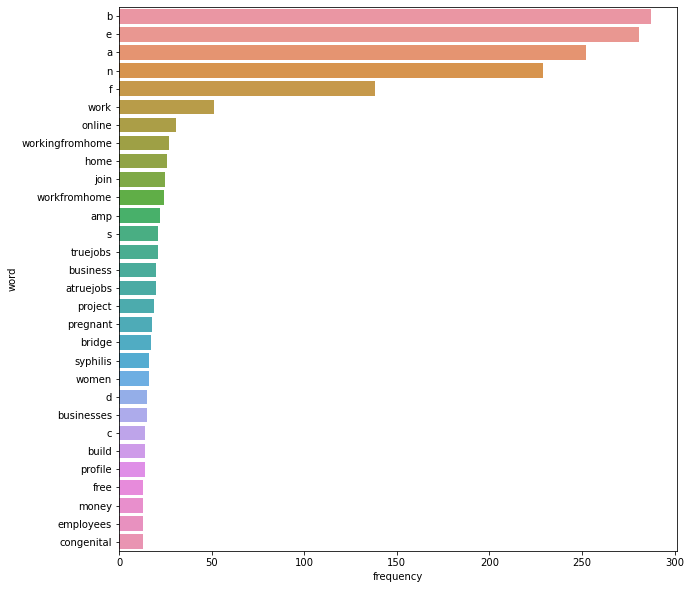

In [138]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [139]:
tweet.to_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_Final_sent_analysis.csv',index=False)

In [140]:
sentiment_df.head()

,text,polarity,sentiment
0,b choose best folding desks design ideas space...,1.0,positive
1,b whether e re working home temporarily perma...,0.55,positive
2,b enjoy best class lighting fill home colours ...,0.7,positive
3,b remove negative energy n ufarman inspire_qu ...,-0.036364,negative
4,b perfect space redesign work productivity n n...,1.0,positive


In [141]:
sentiment_df.describe()

,text,polarity,sentiment
count,263,263.0,263
unique,259,71.0,3
top,b internet millionaire reveals eactly made joi...,0.0,positive
freq,2,90.0,142


In [142]:
sentiment_df.groupby('sentiment').size()

sentiment
negative     31
neutral      90
positive    142
dtype: int64

In [143]:
print(sentiment_df.groupby('polarity').size())

polarity
-0.500000    1
-0.444444    1
-0.333333    1
-0.312500    2
-0.300000    1
            ..
 0.700000    1
 0.733333    1
 0.750000    3
 0.800000    3
 1.000000    9
Length: 71, dtype: int64


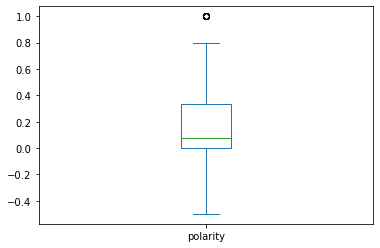

In [144]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

In [145]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

,sentiment,polarity,text
0,positive,1.0,b choose best folding desks design ideas space...
1,positive,0.55,b whether e re working home temporarily perma...
2,positive,0.7,b enjoy best class lighting fill home colours ...
3,negative,-0.036364,b remove negative energy n ufarman inspire_qu ...
4,positive,1.0,b perfect space redesign work productivity n n...
5,neutral,0.0,b urspayce helps list events sell tickets onli...
6,positive,1.0,b perfect desk home office n luebook homeoffic...
7,neutral,0.0,b glazed vitrified tiles e c a n n mm n n f f ...
8,neutral,0.0,b luury sofa manufacturer nwe manufacture luur...
9,neutral,0.0,b must read work home n n vastu vastutips e a


In [146]:
dataset2.describe()#dataset2.hist()
#plt.show()

,sentiment,polarity,text
count,263,263.0,263
unique,3,71.0,259
top,positive,0.0,b internet millionaire reveals eactly made joi...
freq,142,90.0,2


In [147]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [148]:
df1.head()

,text
0,b yrs wfh n neighbours think e m jobless n fa...
1,b opple products offer flicker free lights mul...
2,b wear stress like badge honour disease get ri...
3,b e cchallenges gifts force us search new cen...
4,b pandemic many us gotten habit wearing pants ...


In [149]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [150]:
df_train.head()

,text,sentiment
0,b yrs wfh n neighbours think e m jobless n fa...,neutral
1,b opple products offer flicker free lights mul...,positive
2,b wear stress like badge honour disease get ri...,positive
3,b e cchallenges gifts force us search new cen...,positive
4,b pandemic many us gotten habit wearing pants ...,positive


In [151]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [152]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [153]:
df_test.head()

,text,sentiment
0,b sallysweetwatr libre crossinggain ssrc_org n...,neutral
1,b stay productive still appetite learning e s...,positive
2,b gt gt net time remember talking client anyon...,positive
3,b question time nwould rather work office work...,positive
4,b late freelance projects freelance projects t...,positive


In [154]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [155]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [156]:
df_train.head()
#punctuations are removed from news column in train dataset

,text,sentiment
0,b yrs wfh n neighbours think e m jobless n fa...,neutral
1,b opple products offer flicker free lights mul...,positive
2,b wear stress like badge honour disease get ri...,positive
3,b e cchallenges gifts force us search new cen...,positive
4,b pandemic many us gotten habit wearing pants ...,positive


In [157]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [158]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [159]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [160]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['b', 'opple', 'products', 'offer', 'flicker', 'free', 'lights', 'multiple', 'options', 'light', 'color', 'power', 'band', 'let', 'create', 'balan', 'e', '']
Sentence after removing stopwords: ['b', 'wear', 'stress', 'like', 'badge', 'honour', 'disease', 'get', 'rid', 'n', 'nwork', 'effective', 'till', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'cchallenges', 'gifts', 'force', 'us', 'search', 'new', 'center', 'gravity', 'e', '', 'fight', 'find', 'new', 'way', 'e', '']
Sentence after removing stopwords: ['b', 'pandemic', 'many', 'us', 'gotten', 'habit', 'wearing', 'pants', 'nso', 'ring', 'bell', 'place', 'e', '']
Sentence after removing stopwords: ['b', 'know', 'someone', 'masterful', 'business', 'analyst', 'mention', 'comment', 'n', 'nknow', 'e', '']
Sentence after removing stopwords: ['b', 'login', 'employer', 'zone', 'job', 'openings', 'true', 'jobs', 'n', 'truejobs', 'atruejobs', 'project', 'e', '']
Sentence after removing stopwords

Sentence after removing stopwords: ['b', 'create', 'attractive', 'job', 'profile', 'n', 'truejobs', 'atruejobs', 'project', 'profile', 'e', '']
Sentence after removing stopwords: ['b', 'find', 'home', 'office', 'design', 'trends', 'reflect', 'personal', 'style', 'inspire', 'best', 'work', 'n']
Sentence after removing stopwords: ['b', 'characteristics', 'successful', 'entrepreneur', 'f', 'f', '', 'n', 'nwe', 'looking', 'freshers', 'n', 'work', 'home', 'n', 'digita', 'e', '']
Sentence after removing stopwords: ['b', 'love', 'life', 'live', 'live', 'life', 'love', 'nlife', 'happy', 'healthy', 'n', 'ncheck', 'post', 'e', '']
Sentence after removing stopwords: ['b', 'hello', 'looking', 'staa', 'business', 'online', 'sure', 'begin', 'check', 'join']
Sentence after removing stopwords: ['b', 'develop', 'bridge', 'looking', 'hot', 'prospects', 'building', 'free', 'training', 'build', 'bridge', 'customer', 'e', '']
Sentence after removing stopwords: ['b', 'see', 'build', 'bridge', 'local', 'busi

Sentence after removing stopwords: ['b', 'thelancet', 'nandalipika', 'bmjlatest', 'drmarionlynch', 'thelancetph', 'latimeshealth', 'nincrease', 'number', 'pregnant', 'wome', 'e', '']
Sentence after removing stopwords: ['b', 'amid', 'rising', 'number', 'cases', 'lot', 'us', 'back', 'wfh', 'may', 'hectic', 'many', 'us', 'ar', 'e', '']
Sentence after removing stopwords: ['b', 'one', 'best', 'thing', 'workout', 'n', 'softwaredevelopment', 'workout', 'workingfromhome']
Sentence after removing stopwords: ['b', 'earn', 'cash', 'online', 'obtain', 'free', 'website', 'brings', 'leads', 'local', 'businesses', 'way', 'made', 'f', 'e', '']
Sentence after removing stopwords: ['b', 'briangiovannim', 'scbriand', 'officecmbihar', 'brennansurgeon', 'nincrease', 'congenital', 'syphilis', 'amp', 'pregnant', 'women', 'sero', 'po', 'e', '']
Sentence after removing stopwords: ['b', 'watch', 'free', 'coaching', 'see', 'build', 'bridge', 'local', 'businesses', 'customers', 'using', 'simple', 'e', '']
Sentence

In [161]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['b', 'hahaha', 'happens', 'boss', 'needs', 'work', 'shonotice', 'deadline', 'quality', 'suffers', 'n', 'hr', 'e', '']
Sentence after removing stopwords: ['b', 'brainstorming', 'ideas', 'tough', 'home', 'mother', 'thinks', 'sitting', 'idle', 'starts', 'random', 'conversations', 'noffic', 'e', '']
Sentence after removing stopwords: ['b', 'malware', 'remote', 'devices', 'doubles', 'since', 'fall', 'prey', 'mobile', 'phishing', 'n', 'n', 'malware', 'workfromhome', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'small', 'businesses', 'backbone', 'economy', 'know', 'begin', 'one', 'laptop', 'learn', 'fav', 'e', '']
Sentence after removing stopwords: ['b', 'hey', 'secret', 'weapon', 'marketing', 'toolbo', 'show', 'generate', 'crazy', 'high', 'converting', 'traffic', 'l', 'e', '']
Sentence after removing stopwords: ['b', 'think', 'math', 'hard', 'try', 'nweb', 'design', 'n', 'homeoffice', 'luciano', 'naiara', 'bbb', 'e', '', '', 'e', '', 'ac', '

In [162]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['b', 'yrs', 'wfh', 'n', 'neighbours', 'think', 'e', '', 'jobless', 'n', 'family', 'thinks', 'e', '', 'getting', 'paid', 'talking', 'readi', 'e', '']
Sentence after removing stopwords: ['b', 'dear', 'friends', 'subscribe', 'tube', 'channel', 'valuable', 'suggestion', 'products', 'link', 'e', '']
Sentence after removing stopwords: ['b', 'reminded', 'videos', 'amp', 'tanikarags', 'vbkvinod', 'preparation', 'brother', 'abhiwhy', 'f', 'f', '', '', 'workfromhome', 'upsc']
Sentence after removing stopwords: ['b', 'guess', 'working', 'sunday', 'since', 'morning', 'ef', 'bc', 'b', 'ef', 'bf', '', 'ef', 'bf', 'ef', 'bc', '', 'n', 'n', 'workingfromhome', 'work', 'workfromhome', 'sleepy']
Sentence after removing stopwords: ['b', 'workingfromhome', 'pa', 'f', 'f', 'f', 'f', 'f', 'bb', 'e', '', 'e', '', '', 'ef', 'b', 'f', 'f', 'f', '', '', 'f', 'f', '', '']
Sentence after removing stopwords: ['b', 'design', 'productive', 'homeoffice', 'blogger', 'paradise', 'n', 

Sentence after removing stopwords: ['b', 'dolo', 'also', 'eases', 'pain', 'caused', 'job', 'rejection', 'n', 'nasking', 'friend', 'f', 'f', '', '', 'n', 'n', 'jobseeker', 'tuesdayvibe', 'workingfromhome', 'hr']
Sentence after removing stopwords: ['b', 'yes', 'bank', 'recruitment', 'work', 'home', 'jobs', 'assistant', 'eecutive', 'posts', 'napply']
Sentence after removing stopwords: ['b', 'must', 'read', 'work', 'home', 'n', 'n', 'vastu', 'vastutips', 'e', '']
Sentence after removing stopwords: ['b', 'look', 'around', 'people', 'work', 'entrepreneur', 'employee', 'n', 'learning', 'people', 'work', 'n', 'ar', 'e', '']
Sentence after removing stopwords: ['b', 'hello', 'work', 'desk', 'f', 'f', '', '', 'n', 'n', 'workingfromhome']
Sentence after removing stopwords: ['b', 'work', 'home', 'atrocities', 'like', 'n', 'n', 'iamsom', 'viplavam', 'delhisurii', 'nrbornforpeople', 'akhandaharsha', 'e', '']
Sentence after removing stopwords: ['b', 'e', 'ef', 'b', 'f', 'e', 'ef', 'b', 'f', 'e', 'ef',

In [163]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [164]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_unigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_unigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_unigramneutral.csv",mode='w',index=False,header=False)

In [165]:
df_positive.shape

(667, 2)

In [166]:
df_negative.shape

(185, 2)

In [167]:
df_neutral.shape

(457, 2)

In [168]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_unigram_combine.csv",mode='a',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_unigram_combine.csv",mode='a',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_unigram_combine.csv",mode='a',index=False,header=False)

In [169]:
df3=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_unigram_combine.csv",header=None,names=["unigram","repetation"])
#np.random.seed(0))
df3.head()

,unigram,repetation
0,unigram,repetation
1,NaN,138
2,e,109
3,n,84
4,f,62


In [170]:
df3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_unigram_combine.csv",index=False)

In [171]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [172]:
df3.shape

(2631, 2)

In [173]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [174]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

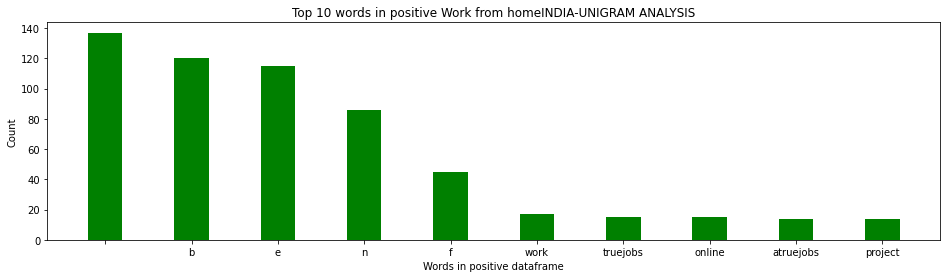

In [175]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive Work from homeINDIA-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

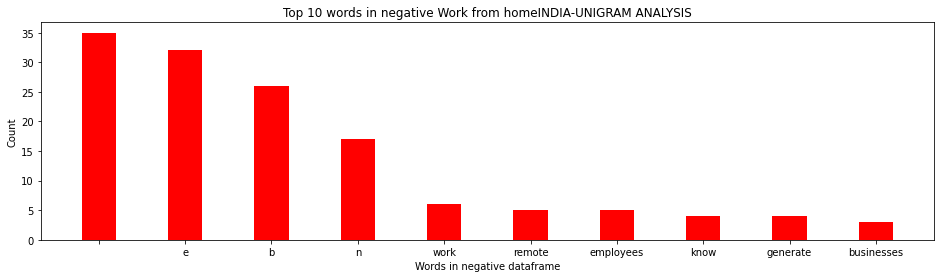

In [176]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative Work from homeINDIA-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

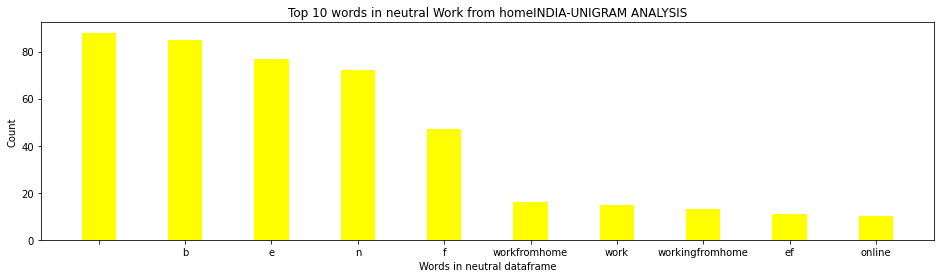

In [177]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral Work from homeINDIA-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [178]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [179]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['b', 'opple', 'products', 'offer', 'flicker', 'free', 'lights', 'multiple', 'options', 'light', 'color', 'power', 'band', 'let', 'create', 'balan', 'e', '']
Sentence after removing stopwords: ['b', 'wear', 'stress', 'like', 'badge', 'honour', 'disease', 'get', 'rid', 'n', 'nwork', 'effective', 'till', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'cchallenges', 'gifts', 'force', 'us', 'search', 'new', 'center', 'gravity', 'e', '', 'fight', 'find', 'new', 'way', 'e', '']
Sentence after removing stopwords: ['b', 'pandemic', 'many', 'us', 'gotten', 'habit', 'wearing', 'pants', 'nso', 'ring', 'bell', 'place', 'e', '']
Sentence after removing stopwords: ['b', 'know', 'someone', 'masterful', 'business', 'analyst', 'mention', 'comment', 'n', 'nknow', 'e', '']
Sentence after removing stopwords: ['b', 'login', 'employer', 'zone', 'job', 'openings', 'true', 'jobs', 'n', 'truejobs', 'atruejobs', 'project', 'e', '']
Sentence after removing stopwords

Sentence after removing stopwords: ['b', 'love', 'life', 'live', 'live', 'life', 'love', 'nlife', 'happy', 'healthy', 'n', 'ncheck', 'post', 'e', '']
Sentence after removing stopwords: ['b', 'hello', 'looking', 'staa', 'business', 'online', 'sure', 'begin', 'check', 'join']
Sentence after removing stopwords: ['b', 'develop', 'bridge', 'looking', 'hot', 'prospects', 'building', 'free', 'training', 'build', 'bridge', 'customer', 'e', '']
Sentence after removing stopwords: ['b', 'see', 'build', 'bridge', 'local', 'businesses', 'customers', 'types', 'easy', 'page', 'bridge', 'e', '']
Sentence after removing stopwords: ['b', 'anniekarni', 'anonnadutt', 'mibindia', 'aboutindia', 'attashheba', 'amrit', 'nincrease', 'number', 'pregnant', 'wome', 'e', '']
Sentence after removing stopwords: ['b', 'bring', 'smart', 'time', 'tracking', 'tool', 'n', 'nto', 'boost', 'work', 'home', 'productivity', 'ncall', 'n', 'nemail', 'e', '']
Sentence after removing stopwords: ['b', 'whether', 'e', '', 'working'

Sentence after removing stopwords: ['b', 'since', 'remote', 'new', 'normal', 'offices', 'become', 'occasional', 'meeting', 'places', 'alternate', 'workplaces', 'e', '']
Sentence after removing stopwords: ['b', 'thelancet', 'nandalipika', 'bmjlatest', 'drmarionlynch', 'thelancetph', 'latimeshealth', 'nincrease', 'number', 'pregnant', 'wome', 'e', '']
Sentence after removing stopwords: ['b', 'amid', 'rising', 'number', 'cases', 'lot', 'us', 'back', 'wfh', 'may', 'hectic', 'many', 'us', 'ar', 'e', '']
Sentence after removing stopwords: ['b', 'one', 'best', 'thing', 'workout', 'n', 'softwaredevelopment', 'workout', 'workingfromhome']
Sentence after removing stopwords: ['b', 'earn', 'cash', 'online', 'obtain', 'free', 'website', 'brings', 'leads', 'local', 'businesses', 'way', 'made', 'f', 'e', '']
Sentence after removing stopwords: ['b', 'briangiovannim', 'scbriand', 'officecmbihar', 'brennansurgeon', 'nincrease', 'congenital', 'syphilis', 'amp', 'pregnant', 'women', 'sero', 'po', 'e', '']

In [180]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['b', 'hahaha', 'happens', 'boss', 'needs', 'work', 'shonotice', 'deadline', 'quality', 'suffers', 'n', 'hr', 'e', '']
Sentence after removing stopwords: ['b', 'brainstorming', 'ideas', 'tough', 'home', 'mother', 'thinks', 'sitting', 'idle', 'starts', 'random', 'conversations', 'noffic', 'e', '']
Sentence after removing stopwords: ['b', 'malware', 'remote', 'devices', 'doubles', 'since', 'fall', 'prey', 'mobile', 'phishing', 'n', 'n', 'malware', 'workfromhome', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'small', 'businesses', 'backbone', 'economy', 'know', 'begin', 'one', 'laptop', 'learn', 'fav', 'e', '']
Sentence after removing stopwords: ['b', 'hey', 'secret', 'weapon', 'marketing', 'toolbo', 'show', 'generate', 'crazy', 'high', 'converting', 'traffic', 'l', 'e', '']
Sentence after removing stopwords: ['b', 'think', 'math', 'hard', 'try', 'nweb', 'design', 'n', 'homeoffice', 'luciano', 'naiara', 'bbb', 'e', '', '', 'e', '', 'ac', '

In [181]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['b', 'yrs', 'wfh', 'n', 'neighbours', 'think', 'e', '', 'jobless', 'n', 'family', 'thinks', 'e', '', 'getting', 'paid', 'talking', 'readi', 'e', '']
Sentence after removing stopwords: ['b', 'dear', 'friends', 'subscribe', 'tube', 'channel', 'valuable', 'suggestion', 'products', 'link', 'e', '']
Sentence after removing stopwords: ['b', 'reminded', 'videos', 'amp', 'tanikarags', 'vbkvinod', 'preparation', 'brother', 'abhiwhy', 'f', 'f', '', '', 'workfromhome', 'upsc']
Sentence after removing stopwords: ['b', 'guess', 'working', 'sunday', 'since', 'morning', 'ef', 'bc', 'b', 'ef', 'bf', '', 'ef', 'bf', 'ef', 'bc', '', 'n', 'n', 'workingfromhome', 'work', 'workfromhome', 'sleepy']
Sentence after removing stopwords: ['b', 'workingfromhome', 'pa', 'f', 'f', 'f', 'f', 'f', 'bb', 'e', '', 'e', '', '', 'ef', 'b', 'f', 'f', 'f', '', '', 'f', 'f', '', '']
Sentence after removing stopwords: ['b', 'design', 'productive', 'homeoffice', 'blogger', 'paradise', 'n', 

Sentence after removing stopwords: ['b', 'look', 'around', 'people', 'work', 'entrepreneur', 'employee', 'n', 'learning', 'people', 'work', 'n', 'ar', 'e', '']
Sentence after removing stopwords: ['b', 'hello', 'work', 'desk', 'f', 'f', '', '', 'n', 'n', 'workingfromhome']
Sentence after removing stopwords: ['b', 'work', 'home', 'atrocities', 'like', 'n', 'n', 'iamsom', 'viplavam', 'delhisurii', 'nrbornforpeople', 'akhandaharsha', 'e', '']
Sentence after removing stopwords: ['b', 'e', 'ef', 'b', 'f', 'e', 'ef', 'b', 'f', 'e', 'ef', 'b', 'f', 'e', 'ef', 'b', 'f', 'e', 'ef', 'b', 'fto', 'receive', 'details', 'dm', 'tet', 'msg', 'app', 'name', 'amp', 'mobile', 'number', 'e', '']
Sentence after removing stopwords: ['b', 'business', 'strategies', 'setting', 'worklifebalance', 'workingfromhome', 'practice', 'saying', 'setting', 'healt', 'e', '']
Sentence after removing stopwords: ['b', 'tuesday', 'felt', 'like', 'mini', 'friday', 'today', 'feels', 'like', 'solid', 'monday', 'n', 'n', 'work', 

In [182]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [183]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_bigrampositive.csv",mode='w',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_bigramnegative.csv",mode='w',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_bigramneutral.csv",mode='w',index=False,header=False)

In [184]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_bigram_combine.csv",mode='a',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_bigram_combine.csv",mode='a',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_bigram_combine.csv",mode='a',index=False,header=False)

In [185]:
df4=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_bigram_combine.csv",header=None,names=["bigram","repetation"])
#np.random.seed(df4.head(20)0))

df4.shape

(4011, 2)

In [186]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

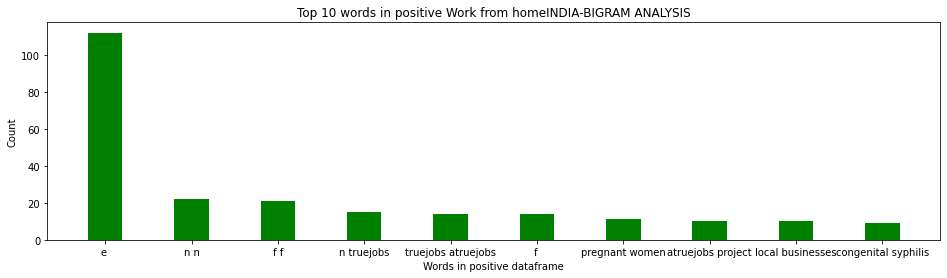

In [187]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive Work from homeINDIA-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

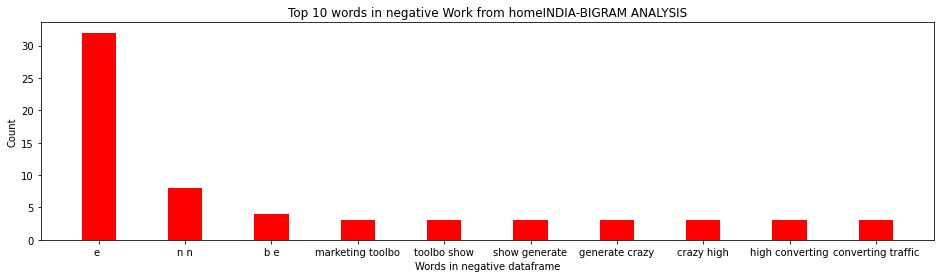

In [188]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative Work from homeINDIA-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

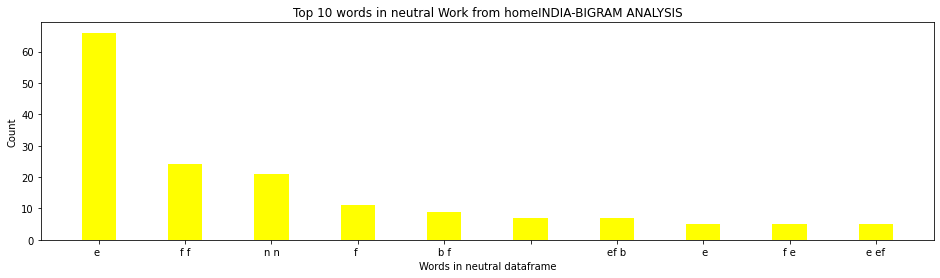

In [189]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral Work from homeINDIA-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [190]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['b', 'opple', 'products', 'offer', 'flicker', 'free', 'lights', 'multiple', 'options', 'light', 'color', 'power', 'band', 'let', 'create', 'balan', 'e', '']
Sentence after removing stopwords: ['b', 'wear', 'stress', 'like', 'badge', 'honour', 'disease', 'get', 'rid', 'n', 'nwork', 'effective', 'till', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'cchallenges', 'gifts', 'force', 'us', 'search', 'new', 'center', 'gravity', 'e', '', 'fight', 'find', 'new', 'way', 'e', '']
Sentence after removing stopwords: ['b', 'pandemic', 'many', 'us', 'gotten', 'habit', 'wearing', 'pants', 'nso', 'ring', 'bell', 'place', 'e', '']
Sentence after removing stopwords: ['b', 'know', 'someone', 'masterful', 'business', 'analyst', 'mention', 'comment', 'n', 'nknow', 'e', '']
Sentence after removing stopwords: ['b', 'login', 'employer', 'zone', 'job', 'openings', 'true', 'jobs', 'n', 'truejobs', 'atruejobs', 'project', 'e', '']
Sentence after removing stopwords

Sentence after removing stopwords: ['b', 'find', 'home', 'office', 'design', 'trends', 'reflect', 'personal', 'style', 'inspire', 'best', 'work', 'n']
Sentence after removing stopwords: ['b', 'characteristics', 'successful', 'entrepreneur', 'f', 'f', '', 'n', 'nwe', 'looking', 'freshers', 'n', 'work', 'home', 'n', 'digita', 'e', '']
Sentence after removing stopwords: ['b', 'love', 'life', 'live', 'live', 'life', 'love', 'nlife', 'happy', 'healthy', 'n', 'ncheck', 'post', 'e', '']
Sentence after removing stopwords: ['b', 'hello', 'looking', 'staa', 'business', 'online', 'sure', 'begin', 'check', 'join']
Sentence after removing stopwords: ['b', 'develop', 'bridge', 'looking', 'hot', 'prospects', 'building', 'free', 'training', 'build', 'bridge', 'customer', 'e', '']
Sentence after removing stopwords: ['b', 'see', 'build', 'bridge', 'local', 'businesses', 'customers', 'types', 'easy', 'page', 'bridge', 'e', '']
Sentence after removing stopwords: ['b', 'anniekarni', 'anonnadutt', 'mibindia

Sentence after removing stopwords: ['b', 'microsoft', 'teams', 'one', 'popular', 'platform', 'online', 'conferencing', 'company', 'reported', 'hitting', 'million', 'e', '']
Sentence after removing stopwords: ['b', 'knitting', 'blanket', 'ganga', 'blankie', 'super', 'comfy', 'soft', 'knit', 'n', 'n', 'ganga', 'knitting', 'crochet', 'e', '']
Sentence after removing stopwords: ['b', 'since', 'remote', 'new', 'normal', 'offices', 'become', 'occasional', 'meeting', 'places', 'alternate', 'workplaces', 'e', '']
Sentence after removing stopwords: ['b', 'thelancet', 'nandalipika', 'bmjlatest', 'drmarionlynch', 'thelancetph', 'latimeshealth', 'nincrease', 'number', 'pregnant', 'wome', 'e', '']
Sentence after removing stopwords: ['b', 'amid', 'rising', 'number', 'cases', 'lot', 'us', 'back', 'wfh', 'may', 'hectic', 'many', 'us', 'ar', 'e', '']
Sentence after removing stopwords: ['b', 'one', 'best', 'thing', 'workout', 'n', 'softwaredevelopment', 'workout', 'workingfromhome']
Sentence after remov

In [191]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['b', 'hahaha', 'happens', 'boss', 'needs', 'work', 'shonotice', 'deadline', 'quality', 'suffers', 'n', 'hr', 'e', '']
Sentence after removing stopwords: ['b', 'brainstorming', 'ideas', 'tough', 'home', 'mother', 'thinks', 'sitting', 'idle', 'starts', 'random', 'conversations', 'noffic', 'e', '']
Sentence after removing stopwords: ['b', 'malware', 'remote', 'devices', 'doubles', 'since', 'fall', 'prey', 'mobile', 'phishing', 'n', 'n', 'malware', 'workfromhome', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'small', 'businesses', 'backbone', 'economy', 'know', 'begin', 'one', 'laptop', 'learn', 'fav', 'e', '']
Sentence after removing stopwords: ['b', 'hey', 'secret', 'weapon', 'marketing', 'toolbo', 'show', 'generate', 'crazy', 'high', 'converting', 'traffic', 'l', 'e', '']
Sentence after removing stopwords: ['b', 'think', 'math', 'hard', 'try', 'nweb', 'design', 'n', 'homeoffice', 'luciano', 'naiara', 'bbb', 'e', '', '', 'e', '', 'ac', '

In [192]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['b', 'yrs', 'wfh', 'n', 'neighbours', 'think', 'e', '', 'jobless', 'n', 'family', 'thinks', 'e', '', 'getting', 'paid', 'talking', 'readi', 'e', '']
Sentence after removing stopwords: ['b', 'dear', 'friends', 'subscribe', 'tube', 'channel', 'valuable', 'suggestion', 'products', 'link', 'e', '']
Sentence after removing stopwords: ['b', 'reminded', 'videos', 'amp', 'tanikarags', 'vbkvinod', 'preparation', 'brother', 'abhiwhy', 'f', 'f', '', '', 'workfromhome', 'upsc']
Sentence after removing stopwords: ['b', 'guess', 'working', 'sunday', 'since', 'morning', 'ef', 'bc', 'b', 'ef', 'bf', '', 'ef', 'bf', 'ef', 'bc', '', 'n', 'n', 'workingfromhome', 'work', 'workfromhome', 'sleepy']
Sentence after removing stopwords: ['b', 'workingfromhome', 'pa', 'f', 'f', 'f', 'f', 'f', 'bb', 'e', '', 'e', '', '', 'ef', 'b', 'f', 'f', 'f', '', '', 'f', 'f', '', '']
Sentence after removing stopwords: ['b', 'design', 'productive', 'homeoffice', 'blogger', 'paradise', 'n', 

Sentence after removing stopwords: ['b', 'dolo', 'also', 'eases', 'pain', 'caused', 'job', 'rejection', 'n', 'nasking', 'friend', 'f', 'f', '', '', 'n', 'n', 'jobseeker', 'tuesdayvibe', 'workingfromhome', 'hr']
Sentence after removing stopwords: ['b', 'yes', 'bank', 'recruitment', 'work', 'home', 'jobs', 'assistant', 'eecutive', 'posts', 'napply']
Sentence after removing stopwords: ['b', 'must', 'read', 'work', 'home', 'n', 'n', 'vastu', 'vastutips', 'e', '']
Sentence after removing stopwords: ['b', 'look', 'around', 'people', 'work', 'entrepreneur', 'employee', 'n', 'learning', 'people', 'work', 'n', 'ar', 'e', '']
Sentence after removing stopwords: ['b', 'hello', 'work', 'desk', 'f', 'f', '', '', 'n', 'n', 'workingfromhome']
Sentence after removing stopwords: ['b', 'work', 'home', 'atrocities', 'like', 'n', 'n', 'iamsom', 'viplavam', 'delhisurii', 'nrbornforpeople', 'akhandaharsha', 'e', '']
Sentence after removing stopwords: ['b', 'e', 'ef', 'b', 'f', 'e', 'ef', 'b', 'f', 'e', 'ef',

In [193]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [194]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_trigram_positive.csv",mode='w',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_trigram_negative.csv",mode='w',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_trigram_neutral.csv",mode='w',index=False,header=False)

In [195]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_trigram_combine.csv",mode='a',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_trigram_combine.csv",mode='a',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_trigram_combine.csv",mode='a',index=False,header=False)

In [196]:
df5=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_INDIA_trigram_combine.csv",header=None,names=["trigram","repetation"])
#np.random.seed(0))
#df5.head(20)
df5.shape

(4362, 2)

In [197]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [198]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [199]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

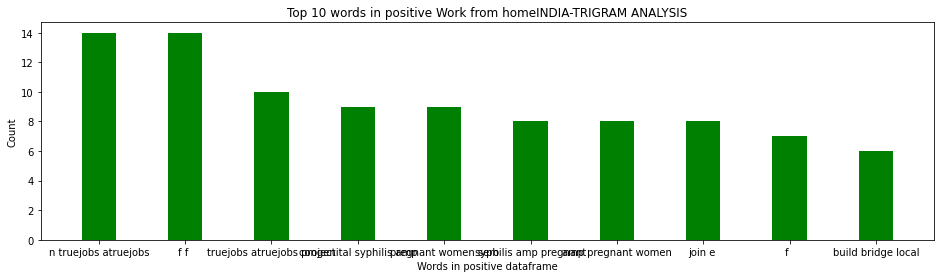

In [200]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive Work from homeINDIA-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

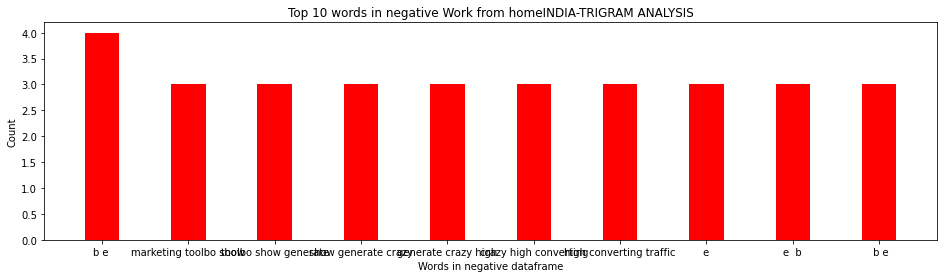

In [201]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative Work from homeINDIA-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

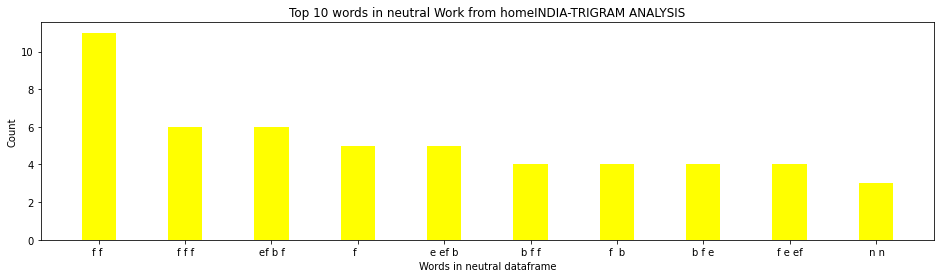

In [202]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral Work from homeINDIA-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()